In [2]:
import pandas as pd
import numpy as np
import subprocess, json, datetime, tqdm, datetime

In [32]:

dates = []
start_date = datetime.datetime(2024, 1, 21)
end_date = datetime.datetime(2025, 1, 21)
while start_date <= end_date:
    dates.append(start_date)
    start_date += datetime.timedelta(days=1)

mapping = pd.read_csv("/afs/cern.ch/work/j/jcapotor/software/fbg/pdvd/mapping/mapping.csv", header=0, index_col=None)

In [33]:
for date in dates:
    dataFrame = pd.DataFrame()
    for index, row in tqdm.tqdm(mapping.iterrows(), total=len(mapping), desc=fr"Processing {date}"):
        curl_command = curl_command = ['curl', f'http://epdtdi-dcs-extract:7070/day/{datetime.datetime.strftime(date, "%Y-%m-%d")}/{row["DCS-ID"]}']
        curl_output = subprocess.run(curl_command, capture_output=True, text=True)
        data = json.loads(curl_output.stdout)
        try:
            df = pd.DataFrame.from_dict(data, orient="index", columns=[str(row["SC-ID"])])
            df.index = pd.to_datetime(pd.to_numeric(df.index), unit='ms') + datetime.timedelta(hours=2)
            dataFrame = pd.concat([dataFrame, df])
        except:
            continue
    dataFrame.to_csv(fr'/eos/user/j/jcapotor/PDVDdata/data/{datetime.datetime.strftime(date, "%Y-%m-%d")}.csv')

Processing 2025-01-21 00:00:00: 100%|██████████| 12/12 [00:00<00:00, 12.09it/s]


In [60]:
data = pd.read_csv(fr'/eos/user/j/jcapotor/PDVDdata/data/2024-12-10.csv')
data = data.set_index("Unnamed: 0")
data.index = pd.to_datetime(data.index)

<AxesSubplot:xlabel='Unnamed: 0'>

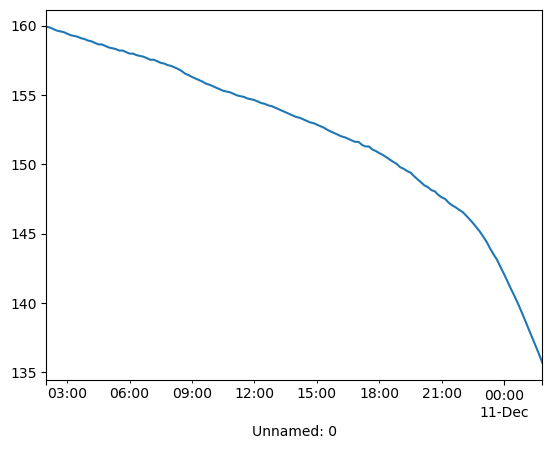

In [63]:
data = data.resample("10min").mean()
data["TE0419"].plot()